In [1]:
import pandas as pd

In [7]:
import numpy as np

In [92]:
import matplotlib.pyplot as plt

In [93]:
%matplotlib inline

In [94]:
import seaborn as sns

In [2]:
df = pd.DataFrame

In [3]:
df = pd.read_csv('winequality-red.csv')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Normalização dos dados y = (y - valor_min) / (valor_max - valor_min)

In [83]:
max = []
min = []
for col in df.columns:
    max.append(df[col].max())
    min.append(df[col].min())
    

In [85]:
max

[15.9, 1.58, 1.0, 15.5, 0.611, 72.0, 289.0, 1.00369, 4.01, 2.0, 14.9, 8]

In [86]:
min

[4.6, 0.12, 0.0, 0.9, 0.012, 1.0, 6.0, 0.9900700000000001, 2.74, 0.33, 8.4, 3]

In [87]:
df1 = pd.DataFrame

for col in df.columns:
    valor_min = df.min()
    valor_max = df.max()
    #print(valor_min, valor_max)
    df1 = (df - valor_min) / (valor_max - valor_min)

In [88]:
# DataFrame resultado normalizado
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [90]:
# Salvar arquivo csv
df1.to_csv('winequality-red_normalizado.csv')

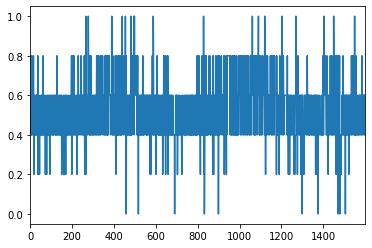

In [99]:
df1['quality'].plot()

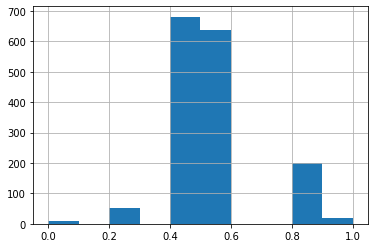

In [100]:
df1['quality'].hist()

In [ ]:
# Machine Learning utilizando modelo de Regressão Logística do Scikit-learn

In [102]:
from sklearn.linear_model import LogisticRegression

In [104]:
from sklearn.model_selection import train_test_split

In [146]:
from sklearn import preprocessing
from sklearn import utils

In [155]:
from sklearn.metrics import classification_report

In [137]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('quality', axis=1), df1['quality'], test_size=0.3)

In [147]:
lab_enc = preprocessing.LabelEncoder()

In [148]:
y_train_encoded = lab_enc.fit_transform(y_train)

In [149]:
logmodel = LogisticRegression(solver='lbfgs', multi_class='auto')

In [150]:
#Treino
logmodel.fit(X_train,y_train_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
#Predição
predictions = logmodel.predict(X_test)

In [157]:
y_test_encoded = lab_enc.fit_transform(y_test)

In [159]:
#Resultado / metricas
print(classification_report(y_test_encoded, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        16
           2       0.60      0.75      0.67       195
           3       0.51      0.58      0.54       197
           4       0.57      0.13      0.22        60
           5       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.28      0.24      0.24       480
weighted avg       0.53      0.56      0.52       480



C:\Users\kduarte\anaconda3\envs\k37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


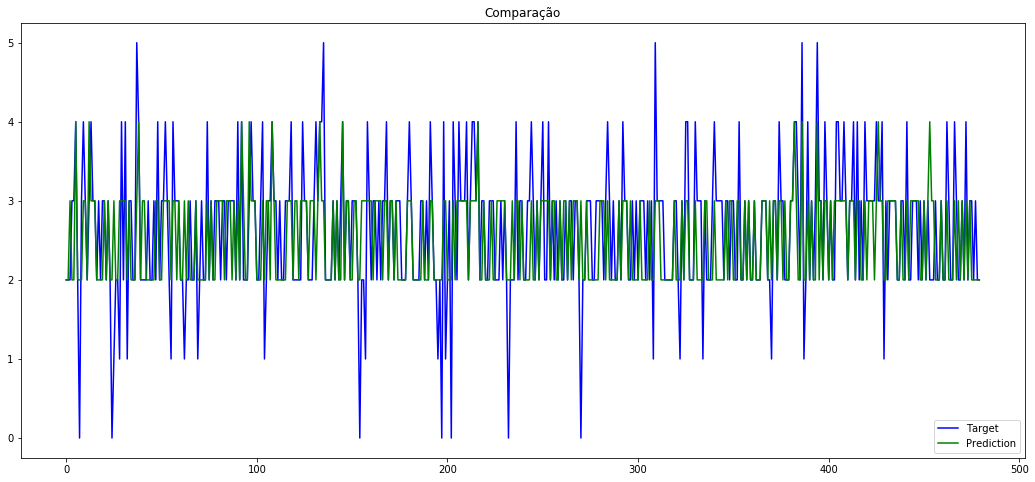

In [177]:
plt.figure(figsize=(18,8))
plt.plot(y_test_encoded, '-b')
plt.plot(predictions, '-g')
plt.title('Comparação')
plt.legend(['Target', 'Prediction'], loc='lower right')

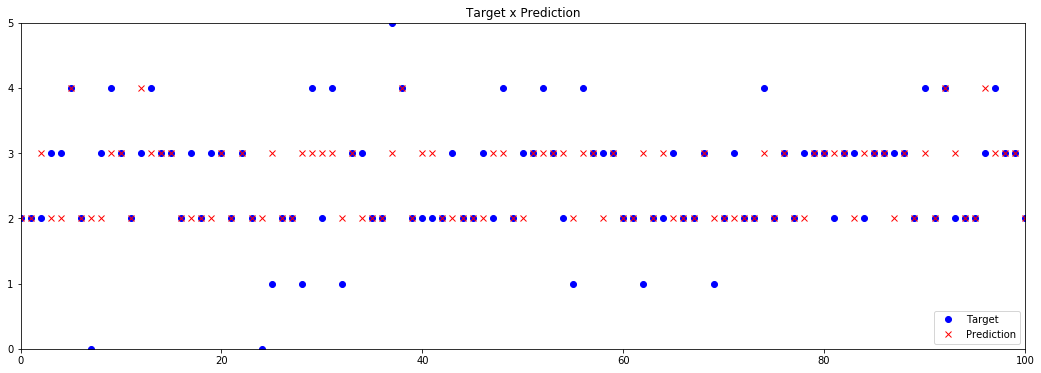

In [184]:
plt.figure(figsize=(18,6))
plt.axis([0, 100, -0, 5])
plt.plot(y_test_encoded, 'bo')
plt.plot(predictions, 'rx')
plt.title('Target x Prediction')
plt.legend(['Target', 'Prediction'], loc='lower right')